In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from fbprophet import Prophet
import altair as alt
import glob 

alt.renderers.enable('notebook')
pd.options.mode.chained_assignment = None  # default='warn'
features_in = "data/features.csv"

In [2]:
def map_color_r(is_card):
    if(is_card): return "r"
    return "b"

def map_color_l(is_card):
    if(is_card): return "y"
    return "g"

In [3]:
column_names = [
        'subject', 'card', 'is_subject_card',
        'pupil_diam_left_mean', 'pupil_diam_right_mean',
        'pupil_diam_left_std', 'pupil_diam_right_std',
        'saccades_num', 'fixations_num', 'duration'
    ]
    
features = pd.read_csv(features_in, sep='\t')
subjects = features[['subject']].groupby('subject').count().index.values
subjects

array([10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 25])

In [4]:
def plotSubjectFeaures(features, sub):
    data = features.loc[features['subject'] == sub]
    data

    colors = data['is_subject_card'].values
    colors_r = list(map(map_color_r, colors))
    colors_l = list(map(map_color_l, colors))

    cards = data['card'].values
    diam_r = data['pupil_diam_right_mean'].values
    diam_l = data['pupil_diam_left_mean'].values
    sacc = data['saccades_num'].values
    fix = data['fixations_num'].values
    dur = data['duration'].values

    errors = data['pupil_diam_right_std'].values

    fig, ass = plt.subplots(5,1, figsize=[15, 20])
    ass[0].set_title("Right Dilation")
    ass[1].set_title("Left Dilation")
    ass[2].set_title("Saccades Num")
    ass[3].set_title("Fixation Num")
    ass[4].set_title("Duration")

    size = 100

    ass[0].scatter(cards, diam_r, color=colors_r, s=size)
    ass[1].scatter(cards, diam_l, color=colors_r, s=size)
    ass[2].scatter(cards, sacc, color=colors_r, s=size)
    ass[3].scatter(cards, fix, color=colors_r, s=size)
    ass[4].scatter(cards, dur, color=colors_r, s=size)
    #ass.errorbar(cards, y, yerr=errors)

    plt.show()

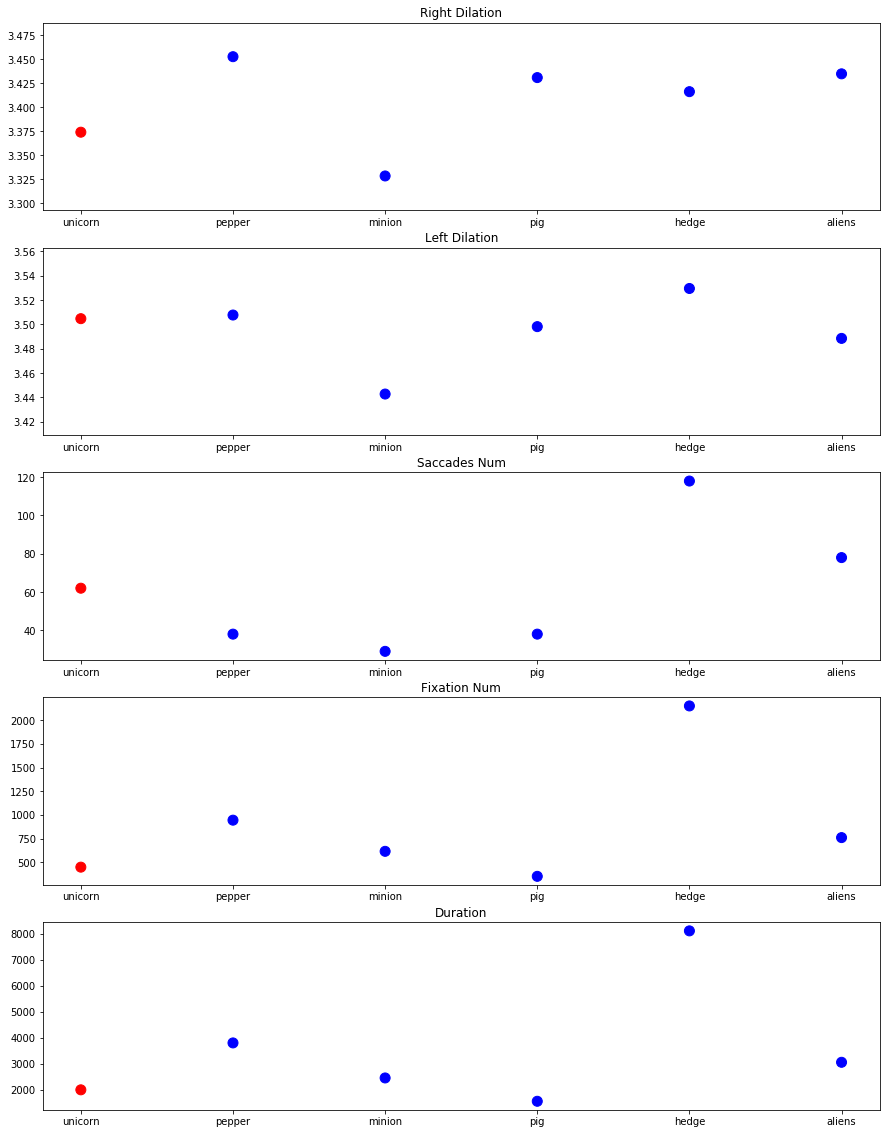

In [8]:
plotSubjectFeaures(features, 18)

#indicare per ogni carta l'odine con cui l'ha vista il soggetto
#plottando comunque tutti nello stesso ordine per confrontarli